In [23]:
# importing required libarires
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor ,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR,LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
from catboost import CatBoostRegressor
import lightgbm as lgb
import seaborn as sns
import matplotlib.pyplot as plt
from colorama import Fore, Back, Style

In [24]:
df=pd.read_csv("./house.csv")


In [25]:
print(Style.BRIGHT+ 'Checking Dataframe:' + Style.RESET_ALL)
print(Style.BRIGHT+ '---------------------' + Style.RESET_ALL)
df.head()

Checking Dataframe:
---------------------


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [26]:
print(Style.BRIGHT+ 'Dataframe information :' + Style.RESET_ALL)
print(Style.BRIGHT+ '---------------------' + Style.RESET_ALL)
df.info()

Dataframe information :
---------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat 

In [27]:
print(Style.BRIGHT+ 'Dataframe Dtypes:' + Style.RESET_ALL)
print(Style.BRIGHT+ '---------------------' + Style.RESET_ALL)

pd.value_counts(df.dtypes)

Dataframe Dtypes:
---------------------


int64      15
float64     5
object      1
dtype: int64

In [28]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [29]:
print(Style.BRIGHT+ 'Dataframe Columns:' + Style.RESET_ALL)
print(Style.BRIGHT+ '---------------------' + Style.RESET_ALL)
df.columns

Dataframe Columns:
---------------------


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [30]:
print(Style.BRIGHT+ 'Dataframe Description:' + Style.RESET_ALL)
print(Style.BRIGHT+ '---------------------' + Style.RESET_ALL)
df.describe()

Dataframe Description:
---------------------


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [31]:
import pandas_summary as ps
dfs = ps.DataFrameSummary(df)
print('categoricals: ', dfs.categoricals.tolist())
print('numerics: ', dfs.numerics.tolist())
dfs.summary()

categoricals:  ['date']
numerics:  ['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.0,NaN,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,...,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0
mean,4580301520.864988,NaN,540088.141767,3.370842,2.114757,2079.899736,15106.967566,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2876565571.312057,NaN,367127.196483,0.930062,0.770163,918.440897,41420.511515,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.67924,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1000102.0,NaN,75000.0,0.0,0.0,290.0,520.0,1.0,0.0,0.0,...,1.0,290.0,0.0,1900.0,0.0,98001.0,47.1559,-122.519,399.0,651.0
25%,2123049194.0,NaN,321950.0,3.0,1.75,1427.0,5040.0,1.0,0.0,0.0,...,7.0,1190.0,0.0,1951.0,0.0,98033.0,47.471,-122.328,1490.0,5100.0
50%,3904930410.0,NaN,450000.0,3.0,2.25,1910.0,7618.0,1.5,0.0,0.0,...,7.0,1560.0,0.0,1975.0,0.0,98065.0,47.5718,-122.23,1840.0,7620.0
75%,7308900445.0,NaN,645000.0,4.0,2.5,2550.0,10688.0,2.0,0.0,0.0,...,8.0,2210.0,560.0,1997.0,0.0,98118.0,47.678,-122.125,2360.0,10083.0
max,9900000190.0,NaN,7700000.0,33.0,8.0,13540.0,1651359.0,3.5,1.0,4.0,...,13.0,9410.0,4820.0,2015.0,2015.0,98199.0,47.7776,-121.315,6210.0,871200.0
counts,21613,21613,21613,21613,21613,21613,21613,21613,21613,21613,...,21613,21613,21613,21613,21613,21613,21613,21613,21613,21613
uniques,21436,372,4028,13,30,1038,9782,6,2,5,...,12,946,306,116,70,70,5034,752,777,8689


In [32]:
df['date']

0        20141013T000000
1        20141209T000000
2        20150225T000000
3        20141209T000000
4        20150218T000000
              ...       
21608    20140521T000000
21609    20150223T000000
21610    20140623T000000
21611    20150116T000000
21612    20141015T000000
Name: date, Length: 21613, dtype: object

In [33]:
# Convert the 'date' column to datetime and extract the year
df['date'] = pd.to_datetime(df['date']).dt.year
df['date']

0        2014
1        2014
2        2015
3        2014
4        2015
         ... 
21608    2014
21609    2015
21610    2014
21611    2015
21612    2014
Name: date, Length: 21613, dtype: int64

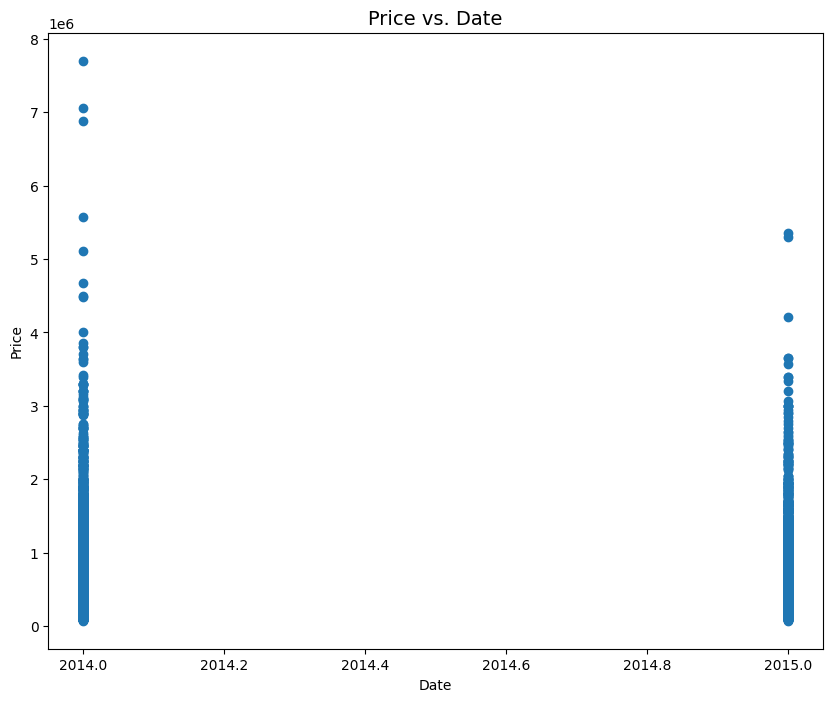

In [34]:
# Plot the date and price column
plt.figure(figsize=(10,8))
plt.scatter(df["date"], df["price"])
plt.title("Price vs. Date", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

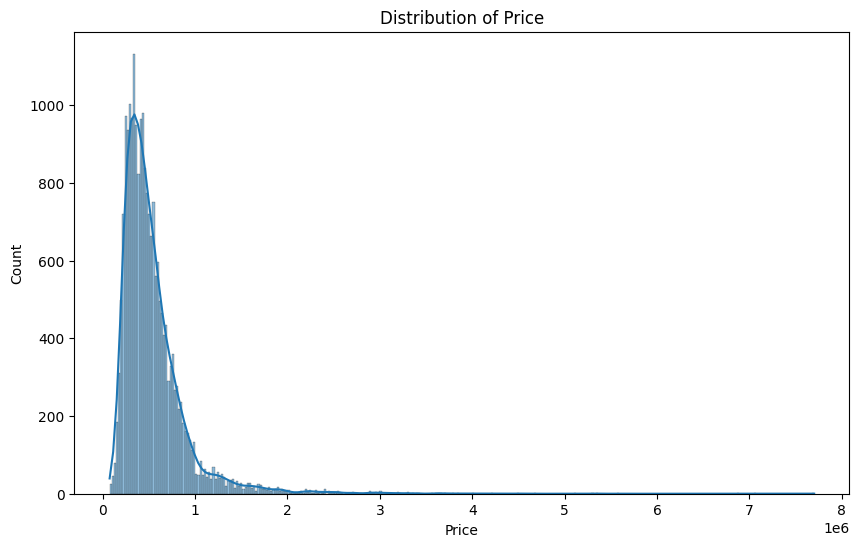

In [35]:
plt.figure(figsize=(10, 6))
sns.histplot(df["price"], kde=True)
plt.xlabel("Price")
plt.ylabel("Count")
plt.title("Distribution of Price")
plt.show()

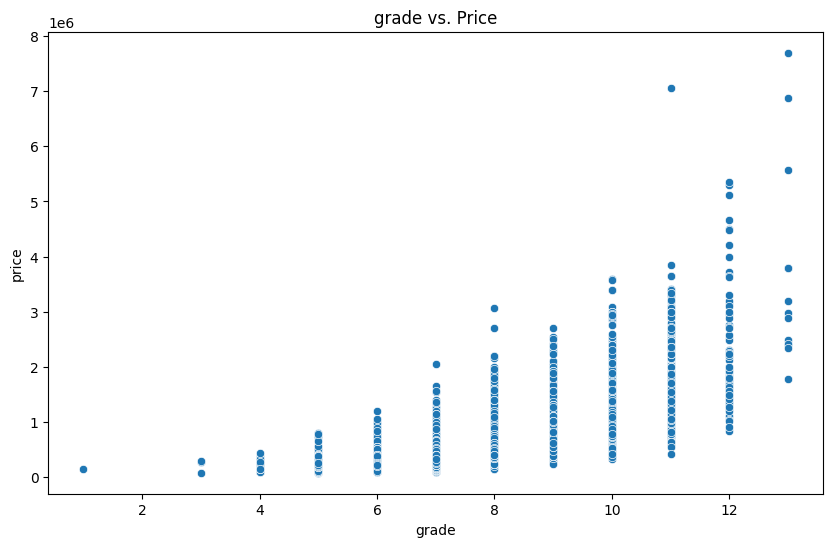

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="grade", y="price", data=df)
plt.xlabel("grade")
plt.ylabel("price")
plt.title("grade vs. Price")
plt.show()

In [37]:
df.drop(["id", "date"], inplace=True, axis=1)
df.head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [38]:
print(Style.BRIGHT+ 'Dataframe information :' + Style.RESET_ALL)
print(Style.BRIGHT+ '---------------------' + Style.RESET_ALL)
df.info()

Dataframe information :
---------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft

In [39]:
print(Style.BRIGHT+ 'Dataframe null values sum :' + Style.RESET_ALL)
print(Style.BRIGHT+ '---------------------' + Style.RESET_ALL)
df.isnull().sum()

Dataframe null values sum :
---------------------


price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [40]:
print(Style.BRIGHT+ 'Dataframe Duplicate values sum :' + Style.RESET_ALL)
print(Style.BRIGHT+ '---------------------' + Style.RESET_ALL)
df.duplicated().sum()

Dataframe Duplicate values sum :
---------------------


5

In [41]:
corelation=df.corr()
corelation

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248


In [42]:
print(Style.BRIGHT+ 'Describe Dataframe:' + Style.RESET_ALL)
print(Style.BRIGHT+ '---------------------' + Style.RESET_ALL)
df['price'].describe().round(2)

Describe Dataframe:
---------------------


count      21613.00
mean      540088.14
std       367127.20
min        75000.00
25%       321950.00
50%       450000.00
75%       645000.00
max      7700000.00
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Density'>

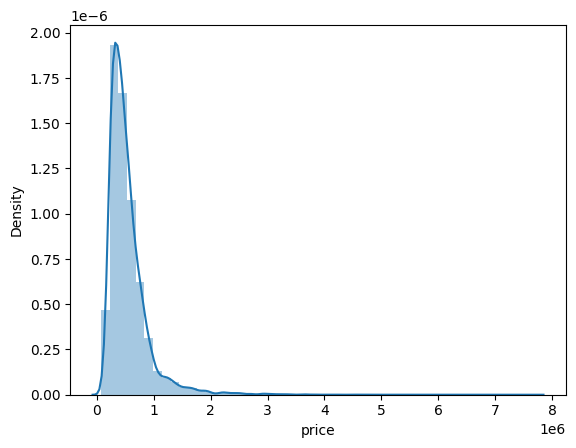

In [43]:
sns.distplot(df['price'])

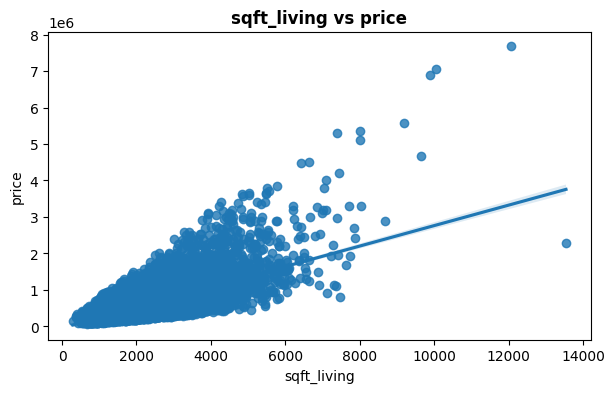

In [44]:
plt.figure(figsize=(7,4))
sns.regplot(data=df, x='sqft_living', y='price')
plt.title('sqft_living vs price', fontweight='bold')

plt.show()

In [45]:
df_sqft_living = df[['price', 'sqft_living']]
df_sqft_living.corr()

,price,sqft_living
price,1.000000,0.702035
sqft_living,0.702035,1.000000


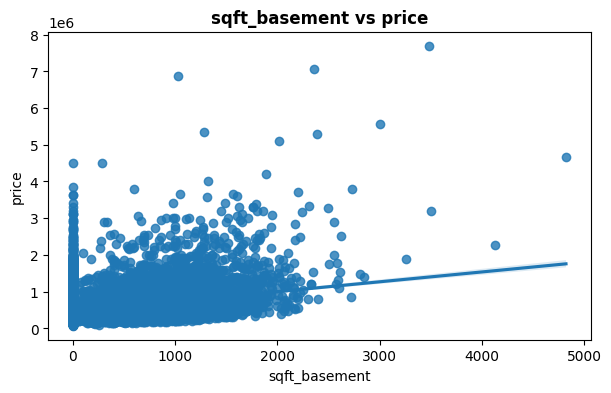

In [46]:
#regplot sqft_basement X price
plt.figure(figsize=(7,4))
sns.regplot(data=df, x='sqft_basement', y='price')
plt.title('sqft_basement vs price', fontweight='bold')

plt.show()

In [47]:
df_sqft_basement = df[['price', 'sqft_basement']]
df_sqft_basement.corr()

,price,sqft_basement
price,1.000000,0.323816
sqft_basement,0.323816,1.000000


(-0.5, 11.5, 0.0, 6000000.0)

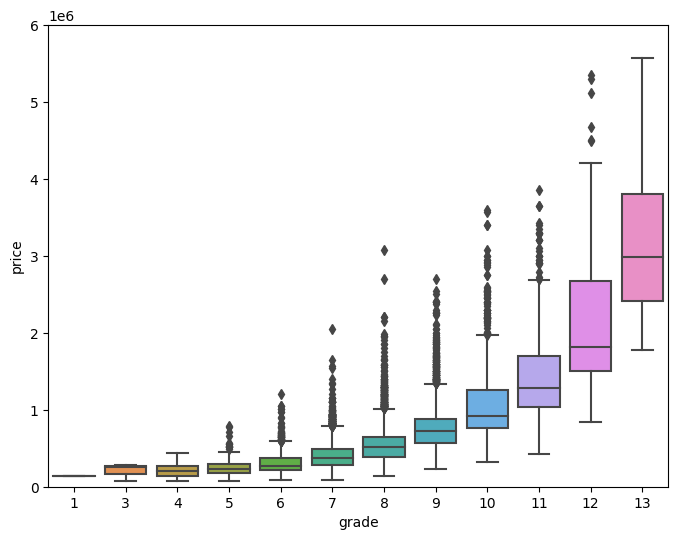

In [48]:
#box plot grade X price
var = 'grade'
data = pd.concat([df['price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=6000000)

In [49]:
df_sqft_grade = df[['price', 'grade']]
df_sqft_grade.corr()

,price,grade
price,1.000000,0.667434
grade,0.667434,1.000000


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115]),
 [Text(0, 0, '1900'),
  Text(1, 0, '1901'),
  Text(2, 0, '1902'),
  Text(3, 0, '1903'),
  Text(4, 0, '1904'),
  Text(5, 0, '1905'),
  Text(6, 0, '1906'),
  Text(7, 0, '1907'),
  Text(8, 0, '1908'),
  Text(9, 0, '1909'),
  Text(10, 0, '1910'),
  Text(11, 0, '1911'),
  Text(12, 0, '1912'),
  Text(13, 0, '1913'),
  Text(14, 0, '1914'),
  Text(15, 

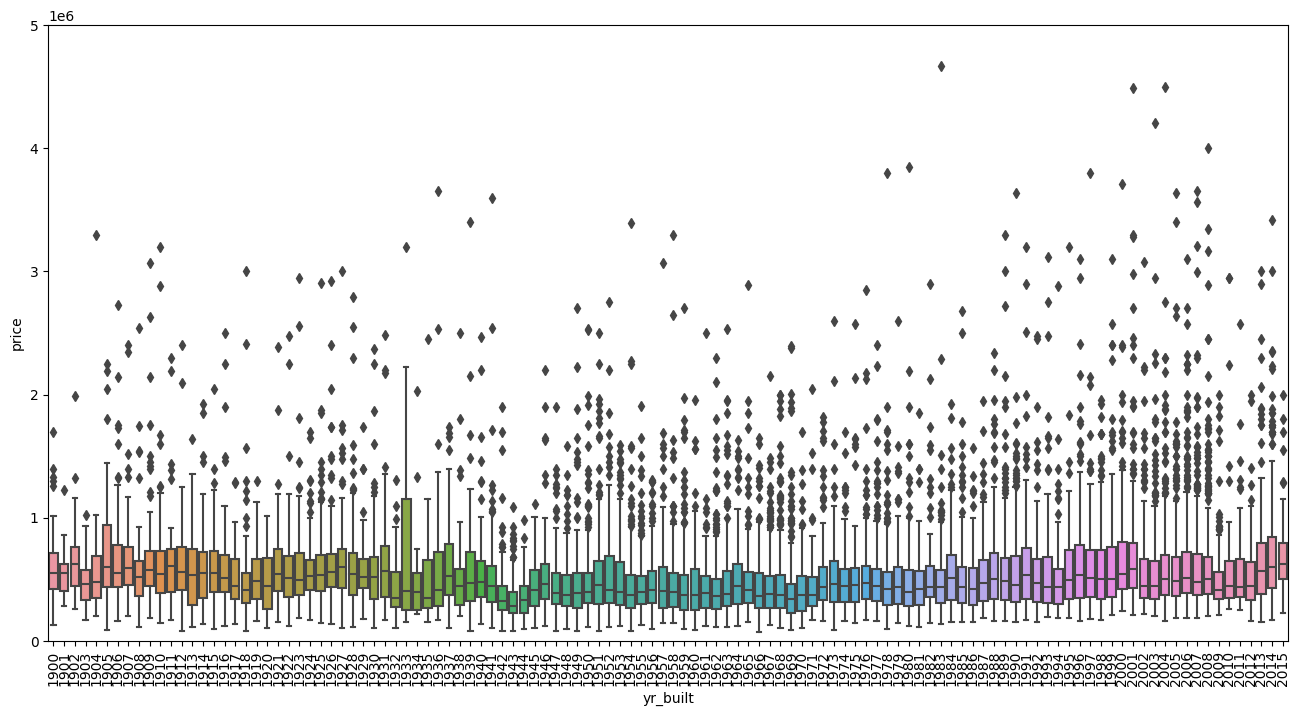

In [50]:
var = 'yr_built'
data = pd.concat([df['price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=5000000);
plt.xticks(rotation=90)

In [51]:
df_yr_built = df[['price', 'yr_built']]
df_yr_built.corr()

,price,yr_built
price,1.000000,0.054012
yr_built,0.054012,1.000000


<Axes: >

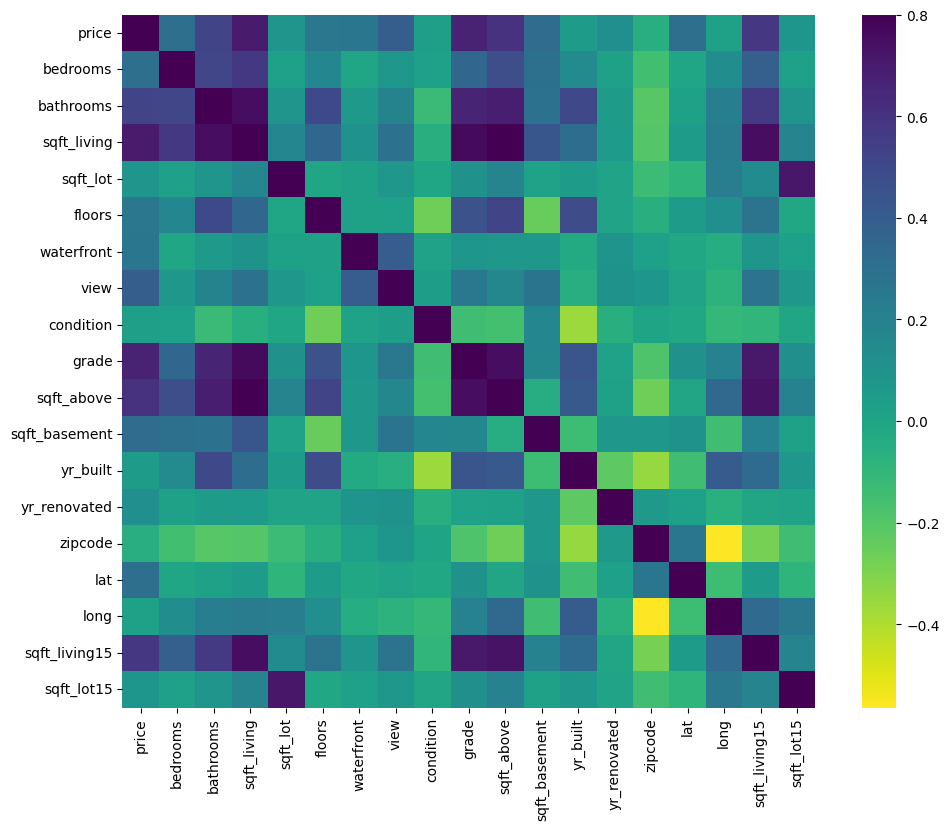

In [52]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, cmap="viridis_r")

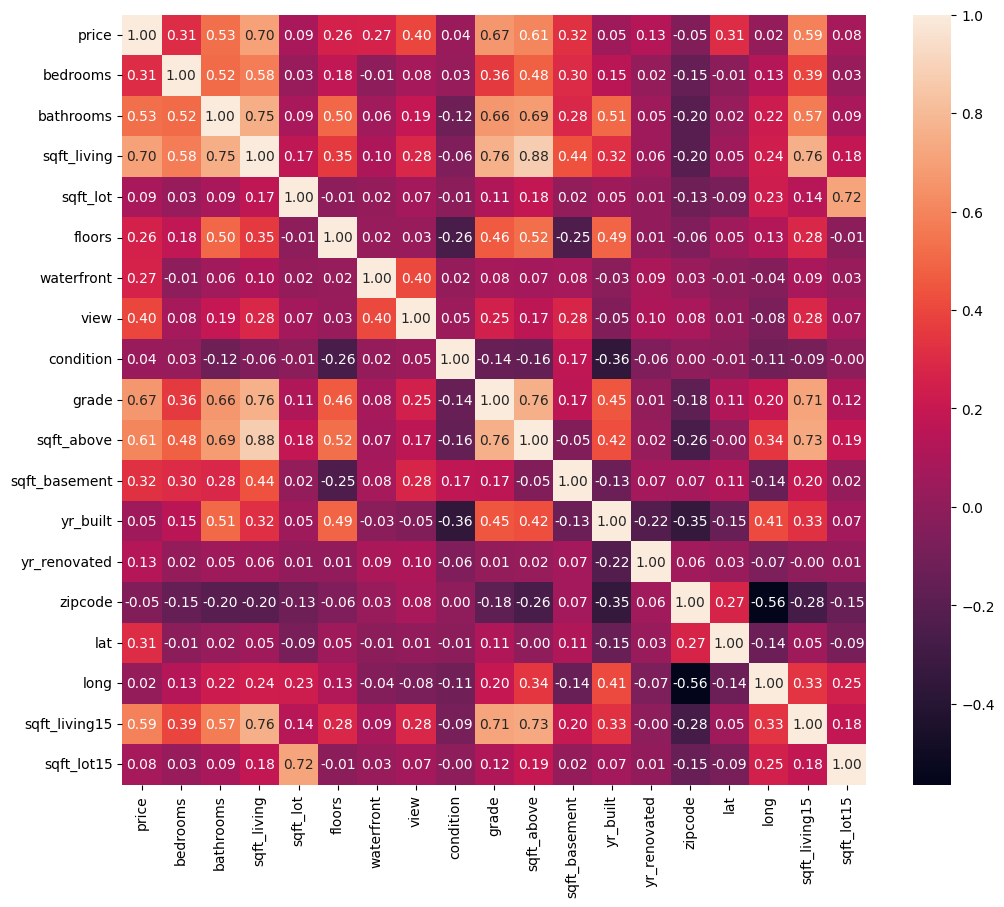

In [53]:
plt.figure(figsize=(12,10))
sns.heatmap(corelation, annot=True, fmt='.2f')
plt.show()

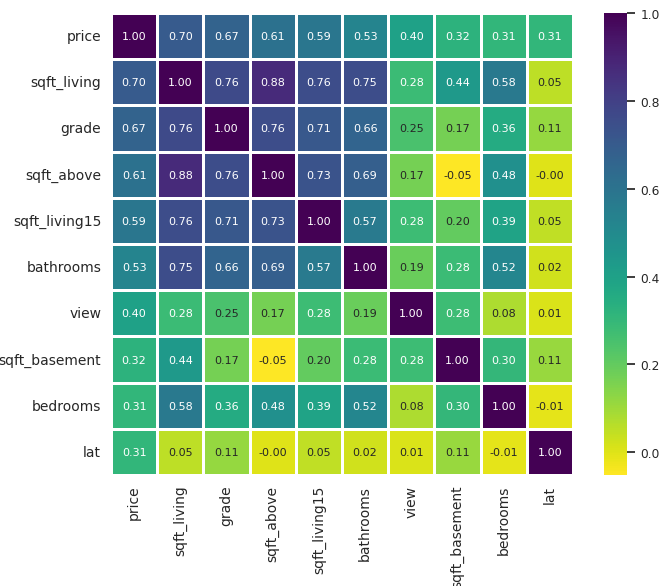

In [54]:
# price correlation matrix

corr = df.corr()
k = 10 #number of variables for heatmap
cols = corr.nlargest(k, 'price')['price'].index
cm = np.corrcoef(df[cols].values.T)

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(8, 6))
    sns.set(font_scale=0.8)
    ax = sns.heatmap(cm,cbar=True, square=True, annot=True,fmt='0.2f',linewidths=.8,
                     cmap="viridis_r", annot_kws={'size': 8}, yticklabels=cols.values,
                     xticklabels=cols.values)

Text(0.5, 1.0, 'Price vs floors')

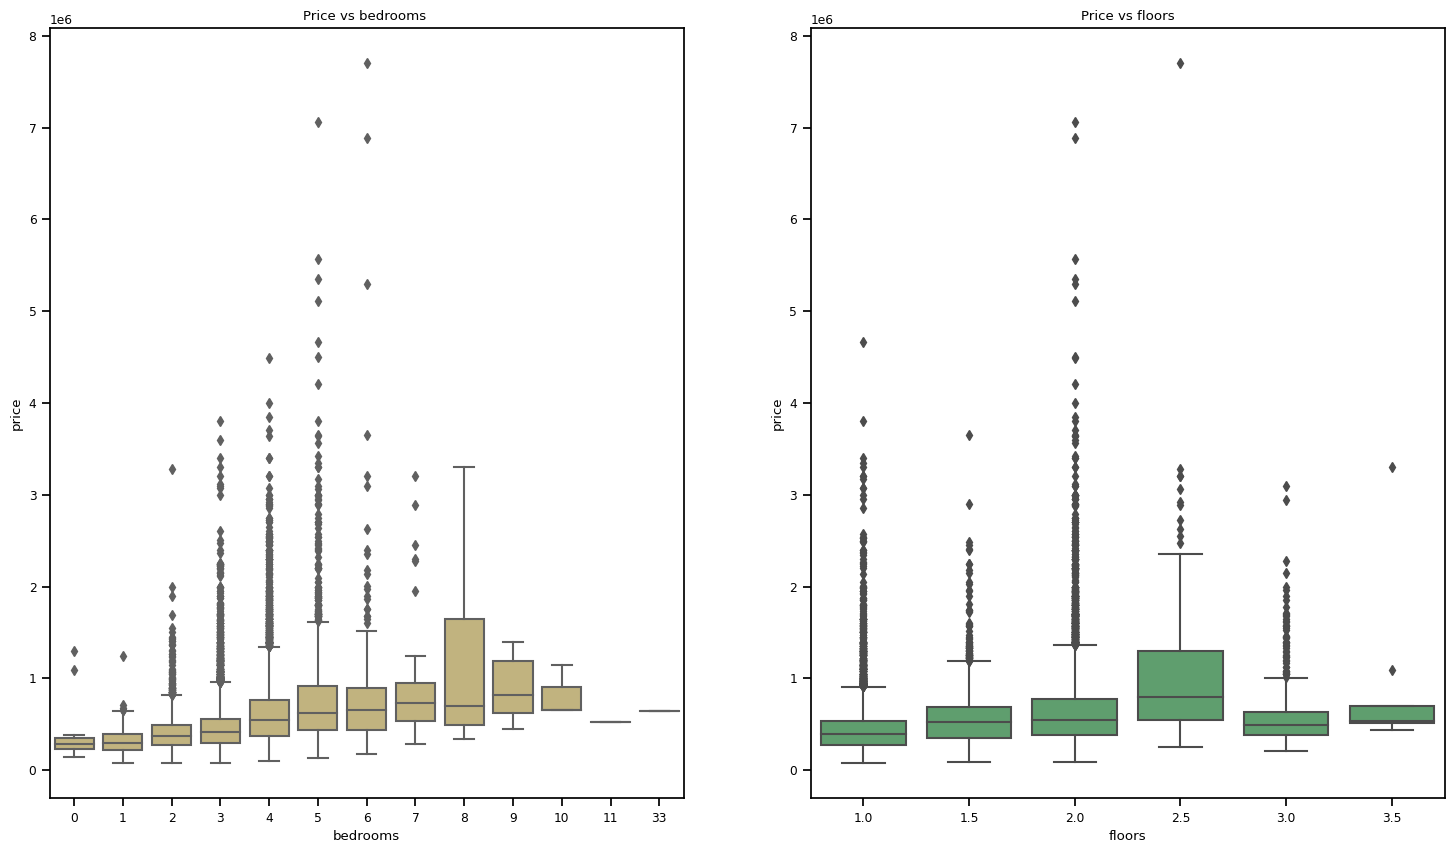

In [55]:
fig= plt.figure(figsize=(18,10))

ax=fig.add_subplot(1,2,1)
sns.boxplot(data=df, x=df["bedrooms"], y=df["price"], hue=None, color='y', ax=ax)
ax.set_title("Price vs bedrooms ")

ax=fig.add_subplot(1,2,2)
sns.boxplot(data=df, x=df["floors"], y=df["price"], hue=None, color='g', ax=ax)
ax.set_title("Price vs floors")

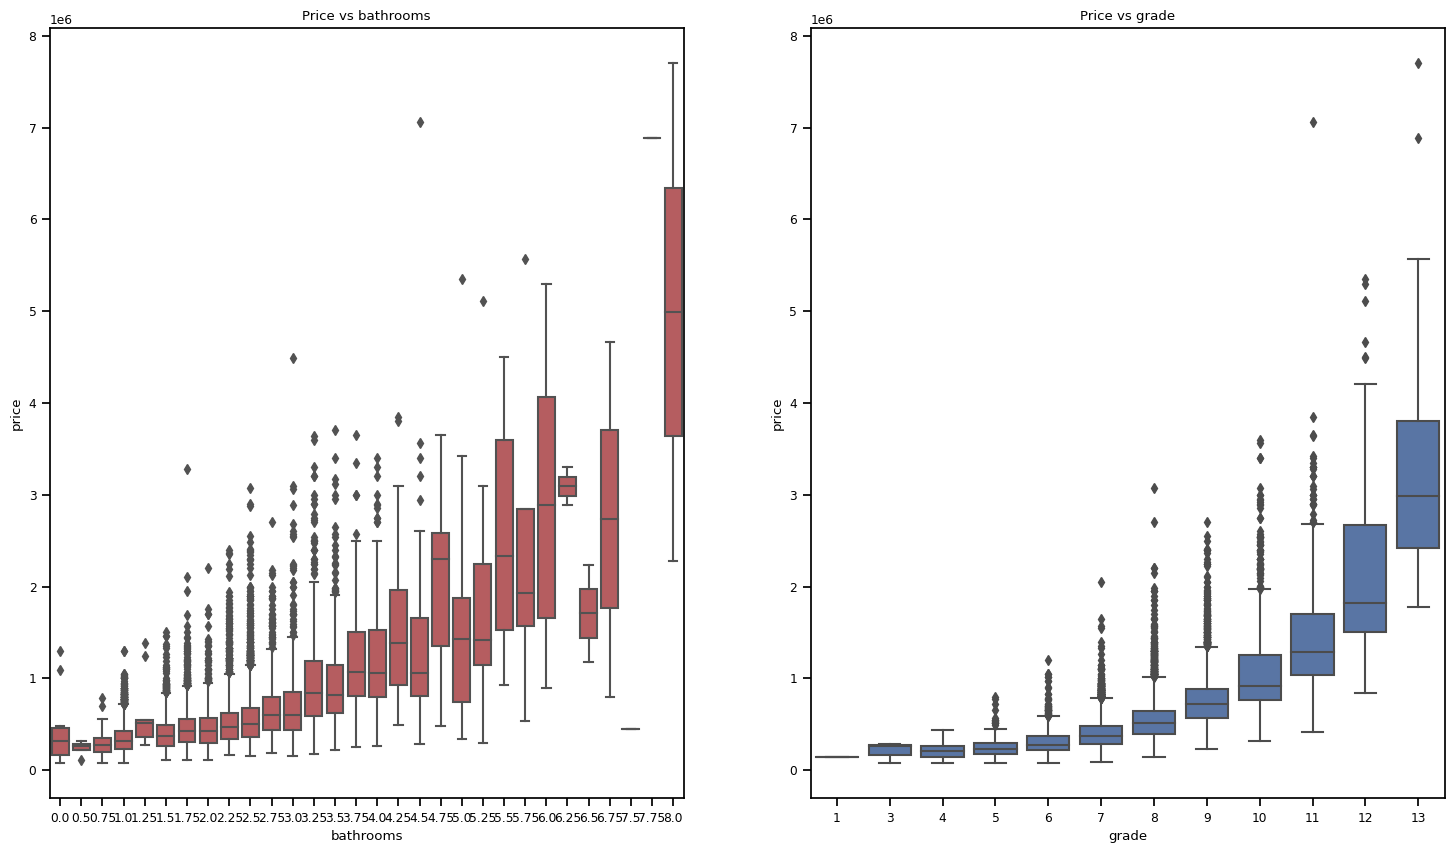

In [57]:
fig= plt.figure(figsize=(18,10))
ax=fig.add_subplot(1,2,1)
sns.boxplot(data=df, x=df["bathrooms"], y=df["price"], hue=None, color='r', ax=ax)
ax.set_title("Price vs bathrooms")


ax=fig.add_subplot(1,2,2)
sns.boxplot(data=df, x=df["grade"], y=df["price"], hue=None, color='b', ax=ax)
ax.set_title("Price vs grade")

plt.show()

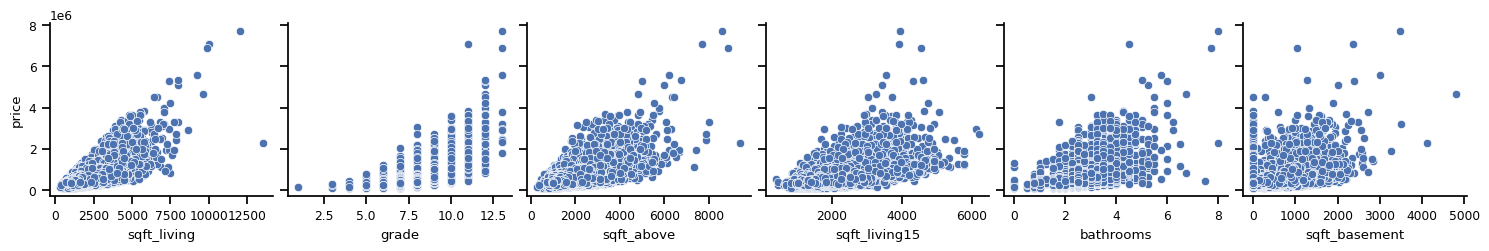

In [58]:
cont_features=['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'sqft_basement']
sns.pairplot(data=df,
                  y_vars='price',
                  x_vars=cont_features)
                  
plt.show()

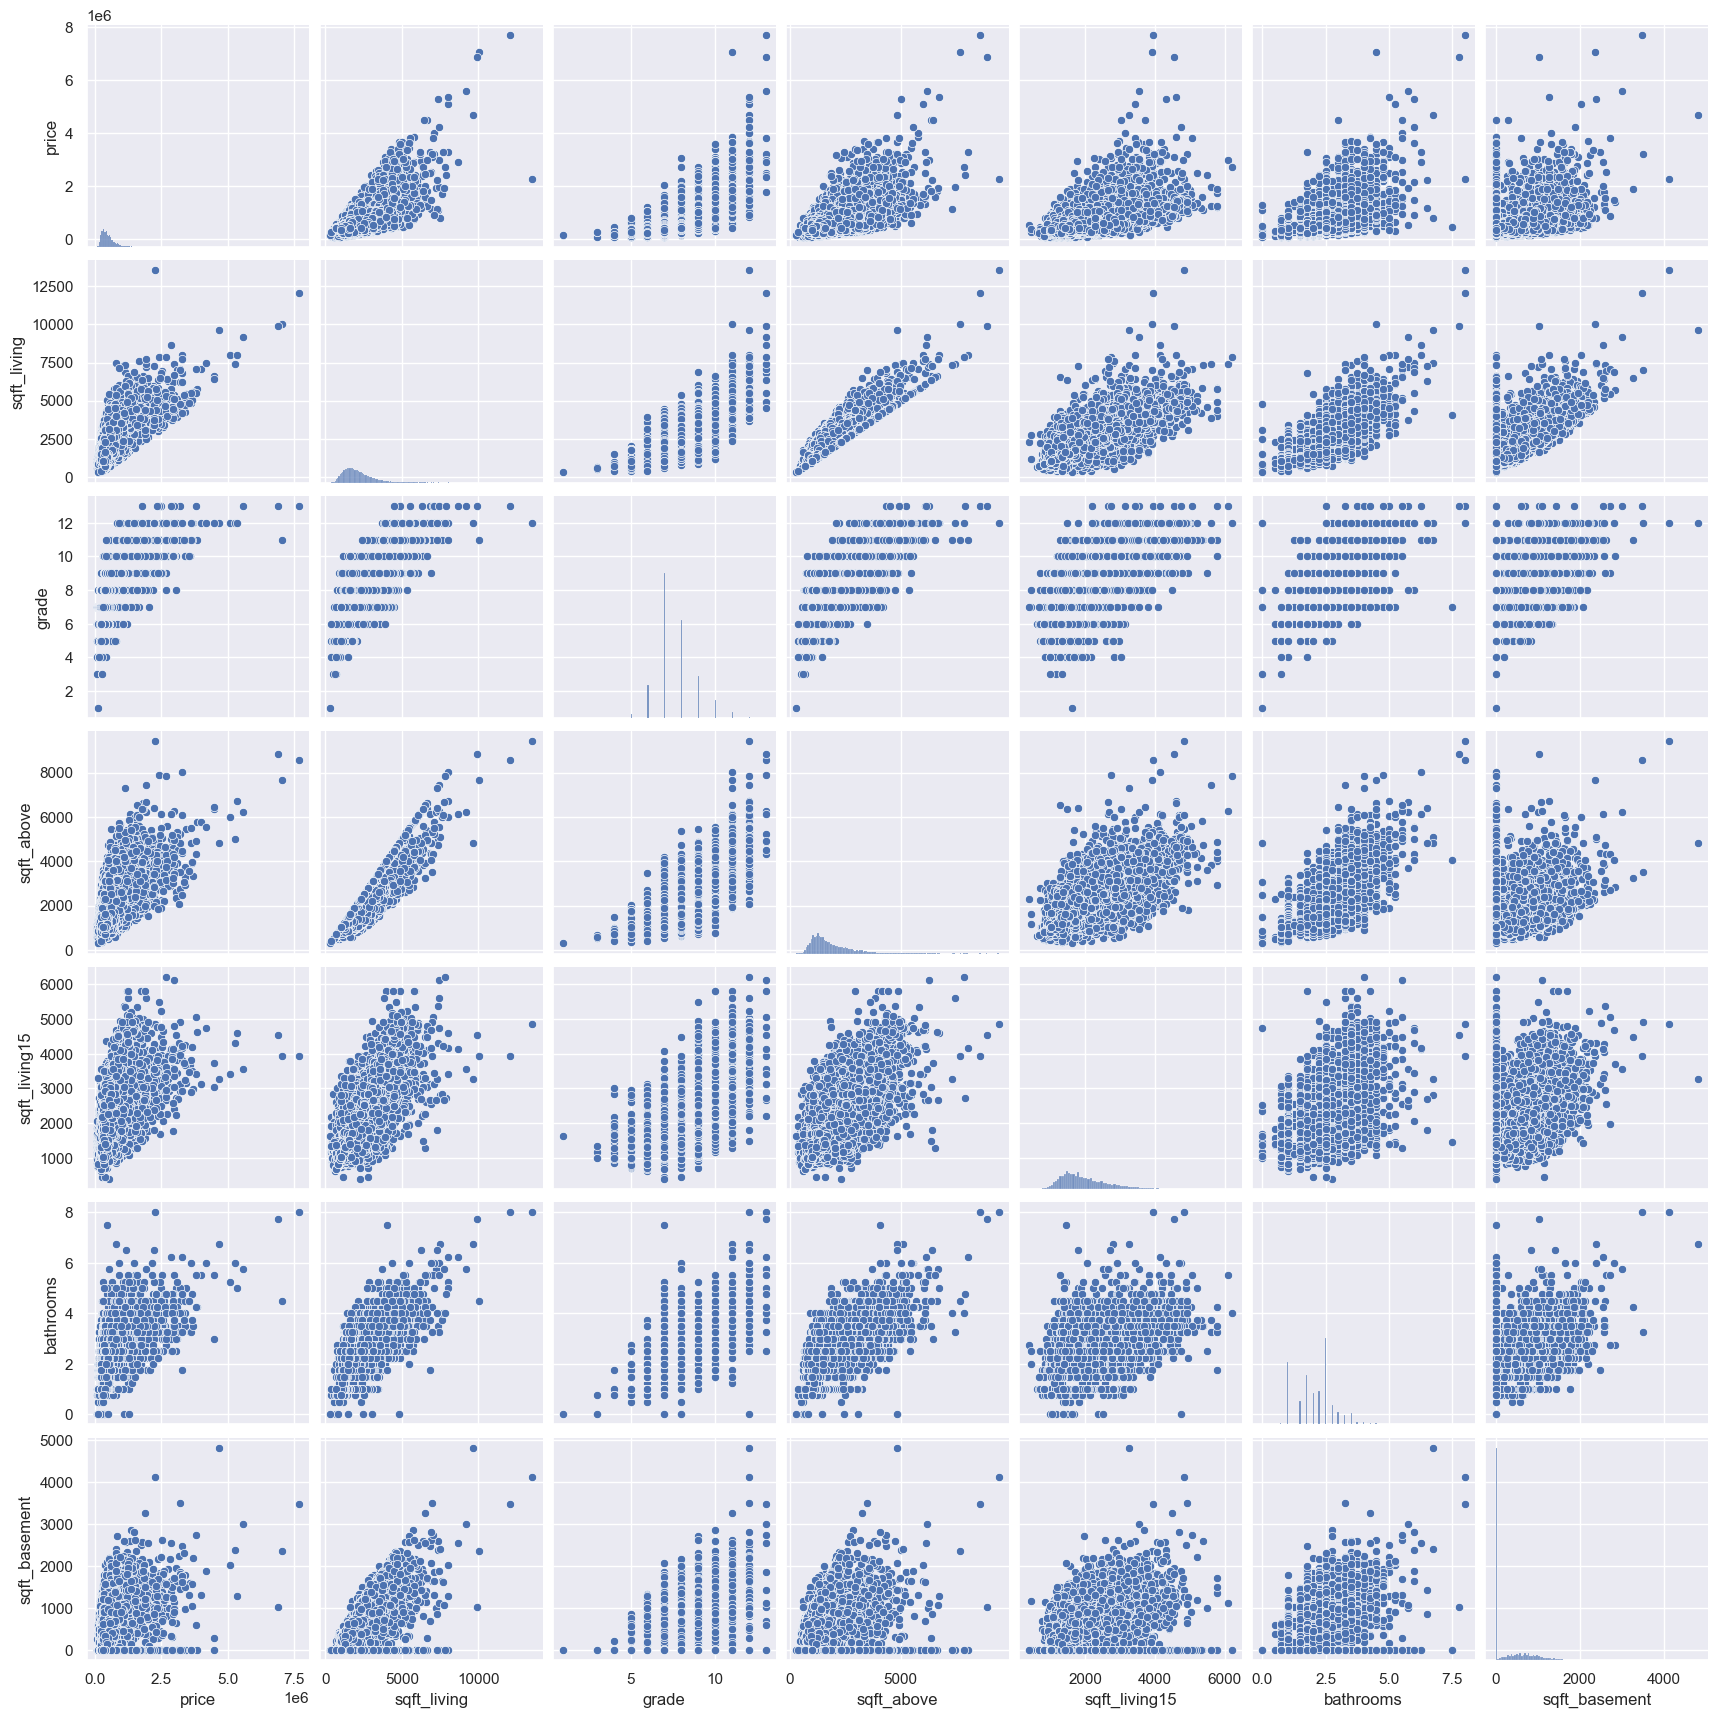

In [59]:
sns.set()
cols = ['price', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'sqft_basement']
sns.pairplot(df[cols], size = 2.5)
plt.show()

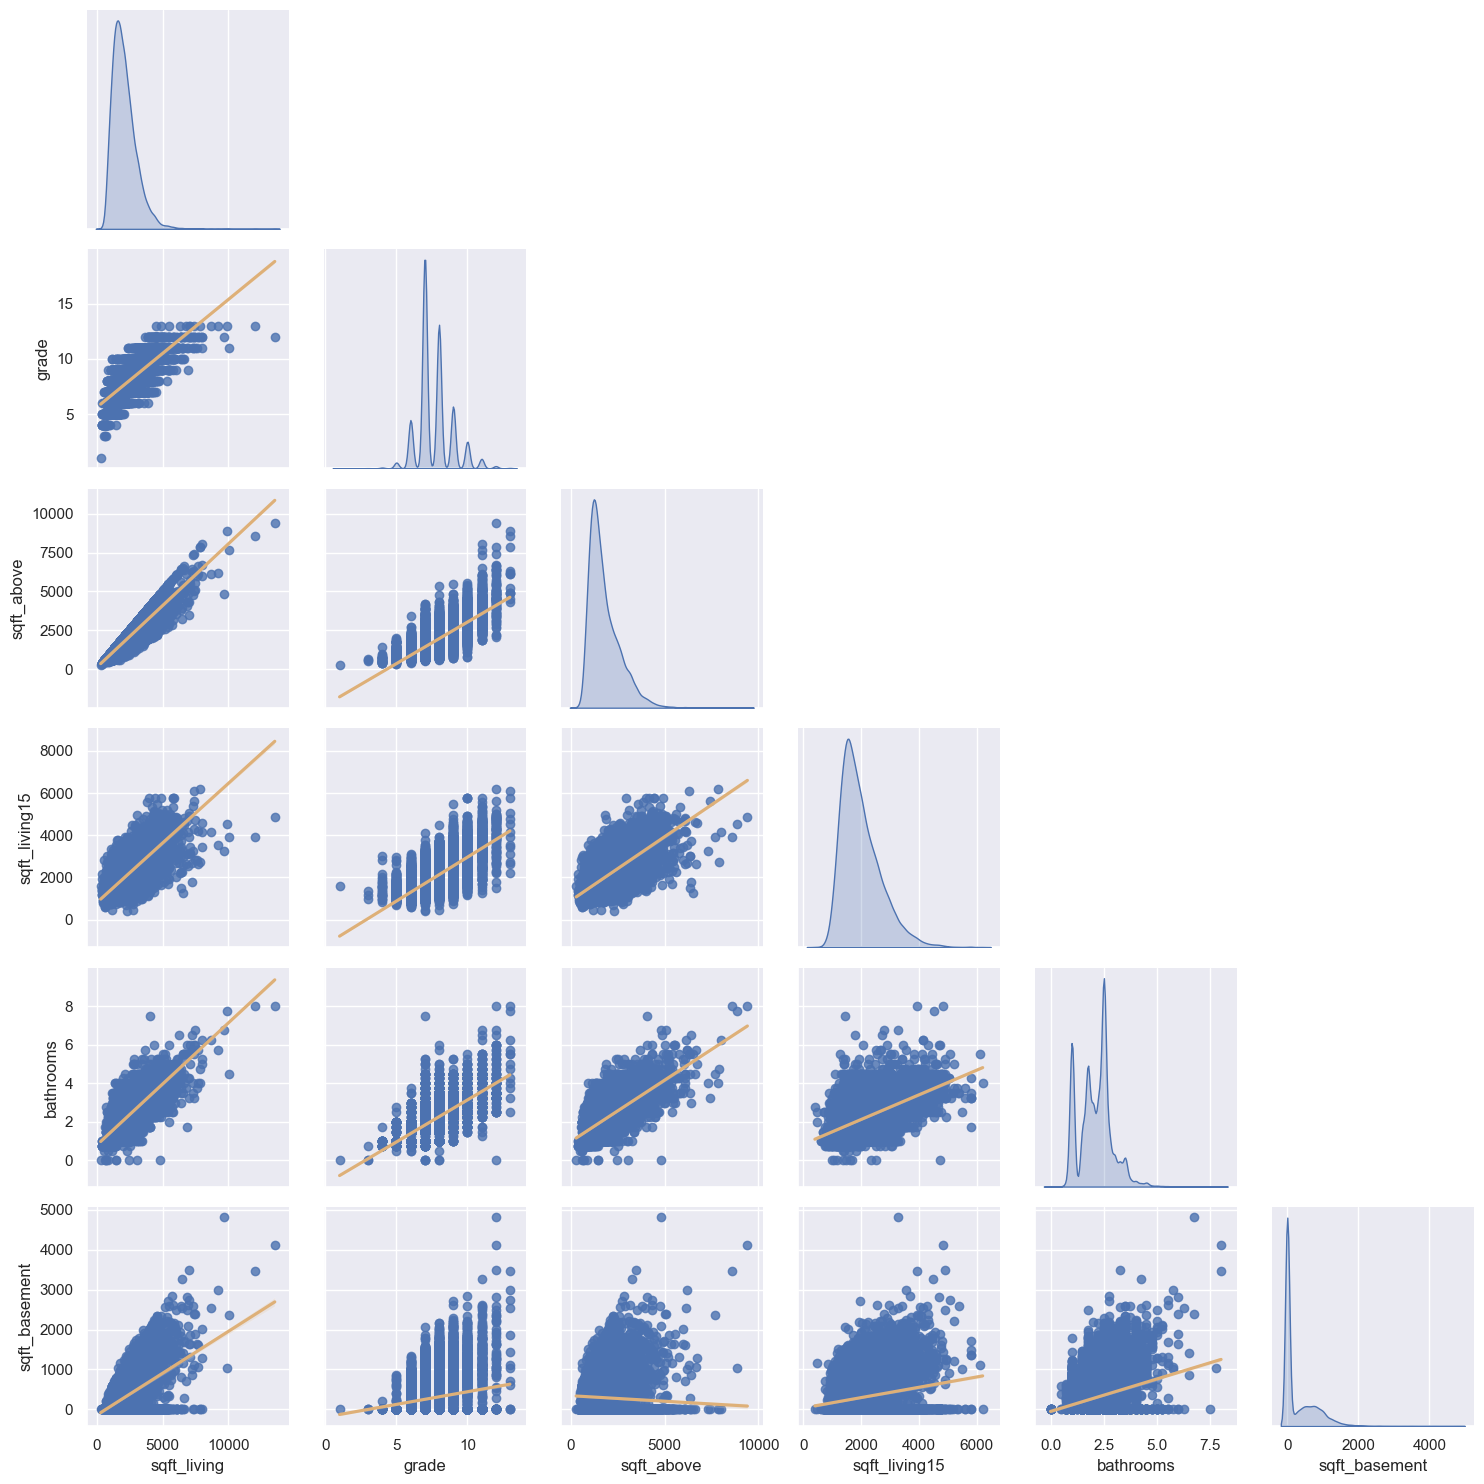

In [60]:
cont_features=['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'sqft_basement']

sns.pairplot(df[cont_features],kind="reg",diag_kind='kde',plot_kws={'line_kws':{'color':'#DEB078'}},corner=True)
plt.tight_layout()
plt.show()

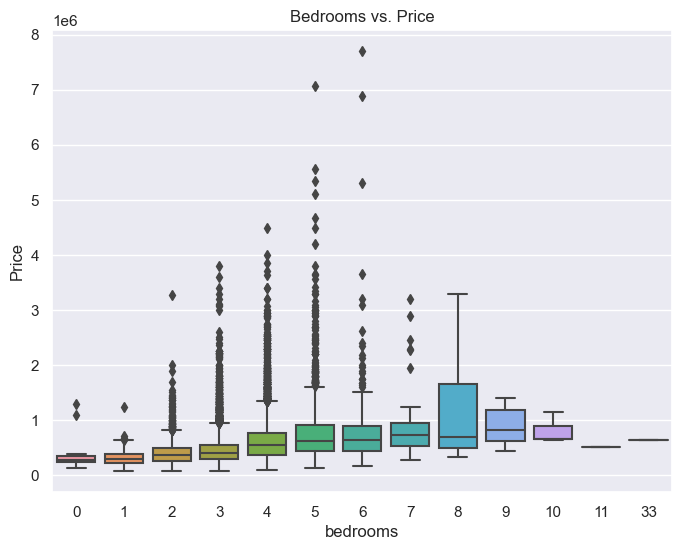

In [64]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="bedrooms", y="price", data=df)
plt.xlabel("bedrooms")
plt.ylabel("Price")
plt.title("Bedrooms vs. Price")
plt.show()

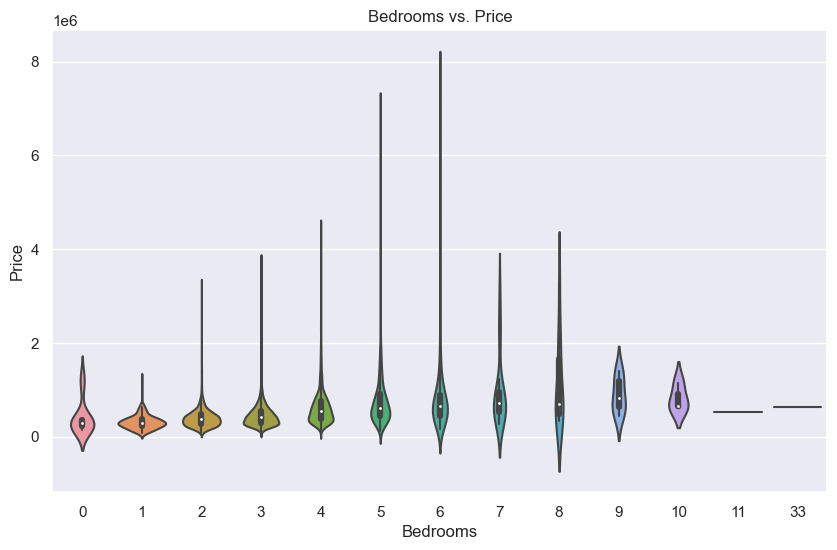

In [65]:
plt.figure(figsize=(10, 6))
sns.violinplot(x="bedrooms", y="price", data=df)
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.title("Bedrooms vs. Price")
plt.show()

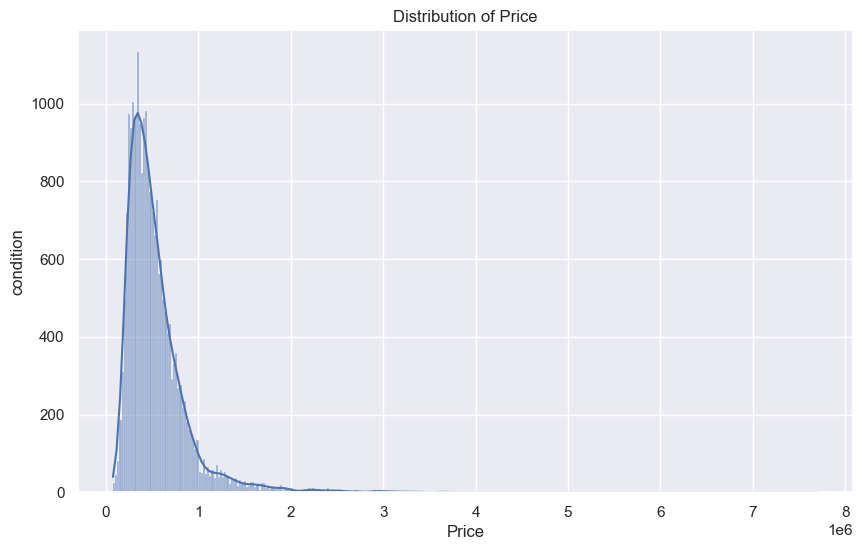

In [66]:
plt.figure(figsize=(10, 6))
sns.histplot(data["price"], kde=True)
plt.xlabel("Price")
plt.ylabel("condition")
plt.title("Distribution of Price")
plt.show()

In [80]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
price,0,0.0
sqft_above,0,0.0
sqft_living15,0,0.0
long,0,0.0
lat,0,0.0
zipcode,0,0.0
yr_renovated,0,0.0
yr_built,0,0.0
sqft_basement,0,0.0
grade,0,0.0


In [81]:
#standardizing data
price_scaled = StandardScaler().fit_transform(df['price'][:,np.newaxis]);
low_range = price_scaled[price_scaled[:,0].argsort()][:10]
high_range= price_scaled[price_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.26686039]
 [-1.25868864]
 [-1.25324081]
 [-1.2505169 ]
 [-1.24779298]
 [-1.24643103]
 [-1.24506907]
 [-1.24234515]
 [-1.23962124]
 [-1.23962124]]

outer range (high) of the distribution:
[[10.75649871]
 [10.78646177]
 [11.24407943]
 [12.45022882]
 [12.96559346]
 [13.10178919]
 [13.70105041]
 [17.28299812]
 [17.76649297]
 [19.50298853]]


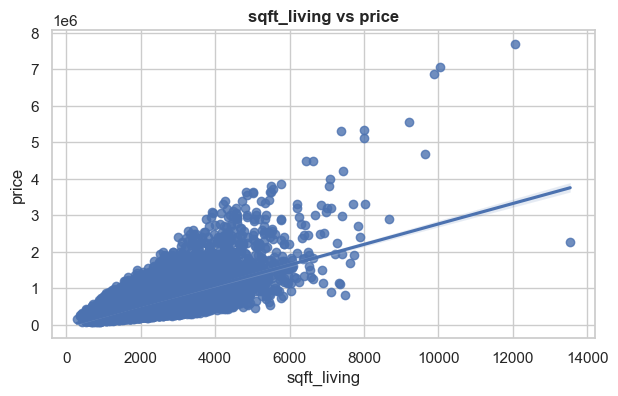

In [82]:
#bivariate analysis price X sqft_living
plt.figure(figsize=(7,4))
sns.regplot(data=df, x='sqft_living', y='price')
plt.title('sqft_living vs price', fontweight='bold')

plt.show()

In [85]:
# Identify the 3 outliers in the dataset
df.sort_values(by='price', ascending=False).head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,7700000.0,6,8.00,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3914,7062500.0,5,4.50,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9254,6885000.0,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730


In [86]:
#deleting the 3 outliers
df.sort_values(by = 'price', ascending = False)[:1]
df = df.drop(df[df['price'] == 7700000].index)
df = df.drop(df[df['price'] == 7062500].index)
df = df.drop(df[df['price'] == 6885000].index)

Text(0.5, 1.0, 'sqft_living vs price')

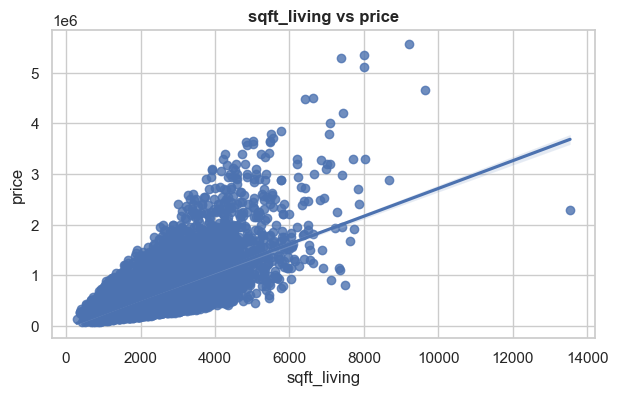

In [87]:
# Checking
plt.figure(figsize=(7,4))
sns.regplot(data=df, x='sqft_living', y='price')
plt.title('sqft_living vs price', fontweight='bold')

In [88]:
#standardizing data - check
price_scaled = StandardScaler().fit_transform(df['price'][:,np.newaxis]);
low_range = price_scaled[price_scaled[:,0].argsort()][:10]
high_range= price_scaled[price_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.29438979]
 [-1.2860238 ]
 [-1.28044648]
 [-1.27765781]
 [-1.27486915]
 [-1.27347482]
 [-1.27208049]
 [-1.26929182]
 [-1.26650316]
 [-1.26650316]]

outer range (high) of the distribution:
[[ 9.23281398]
 [ 9.65111347]
 [10.23115542]
 [11.0147698 ]
 [11.04544509]
 [11.51394052]
 [12.74876061]
 [13.27637569]
 [13.41580885]
 [14.02931477]]


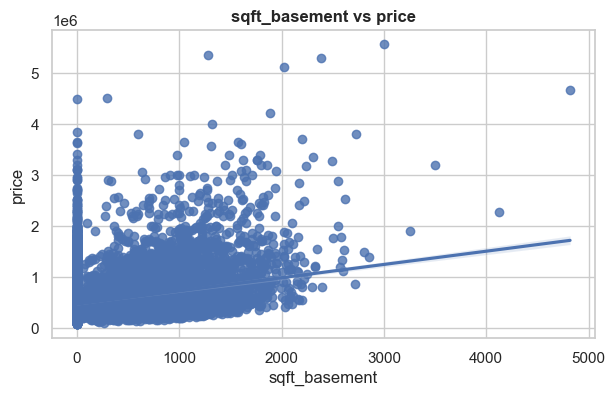

In [89]:
#bivariate analysis price X sqft_basement

plt.figure(figsize=(7,4))
sns.regplot(data=df, x='sqft_basement', y='price')
plt.title('sqft_basement vs price', fontweight='bold')

plt.show()

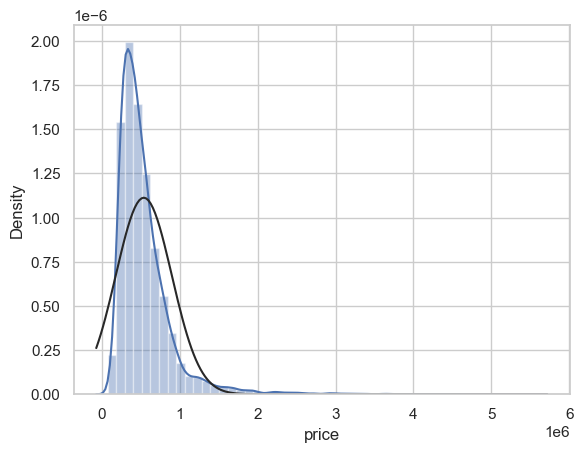

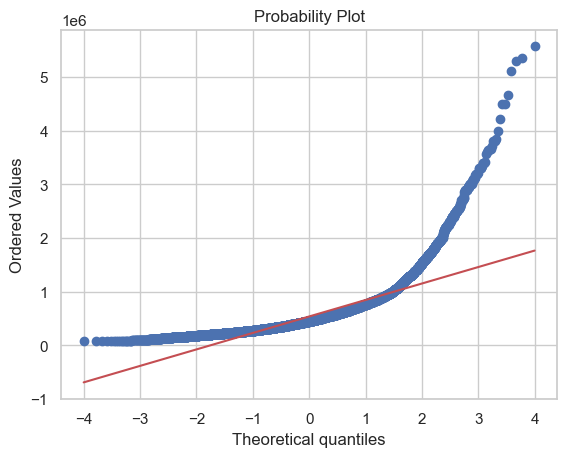

In [91]:
# histogram and normal probability plot
from scipy import stats
from scipy.stats import norm
sns.distplot(df['price'], fit=norm)
fig = plt.figure()
res = stats.probplot(df['price'], plot=plt)

In [92]:
#applying log transformation

df['price'] = np.log(df['price'])

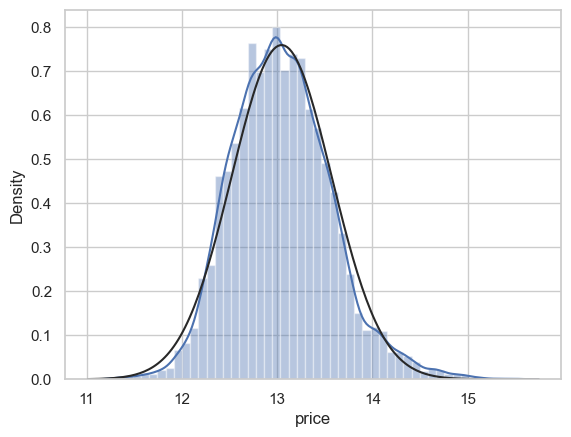

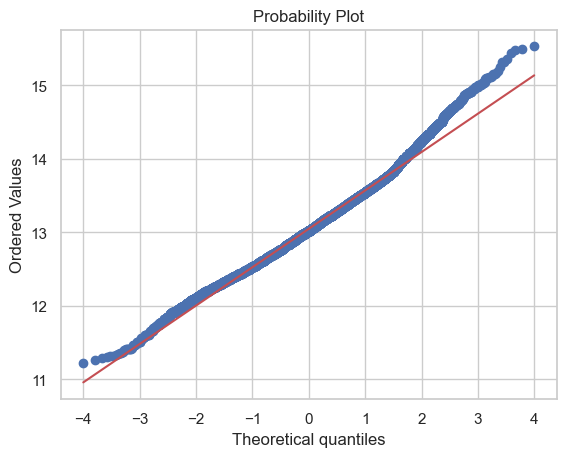

In [93]:
sns.distplot(df['price'], fit=norm)
fig = plt.figure()
res = stats.probplot(df['price'], plot=plt)

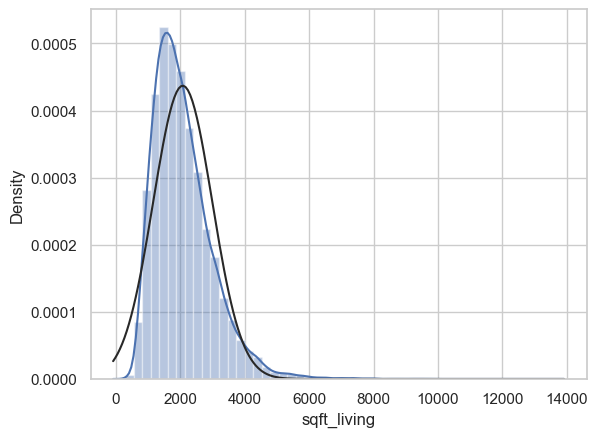

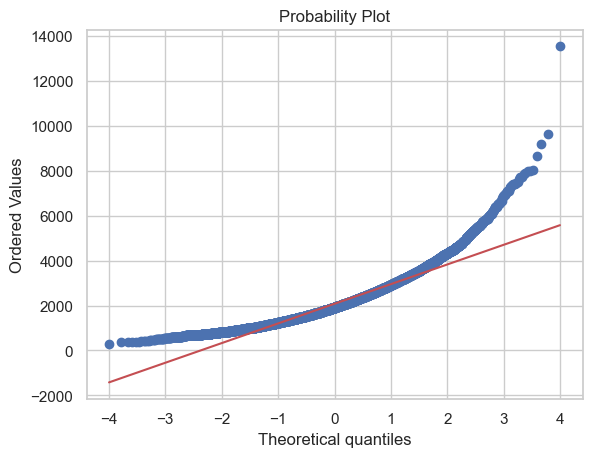

In [94]:
#histogram and normal probability plot

sns.distplot(df['sqft_living'], fit=norm)
fig = plt.figure()
res = stats.probplot(df['sqft_living'], plot=plt)

In [95]:
df['sqft_living'] = np.log(df['sqft_living'])

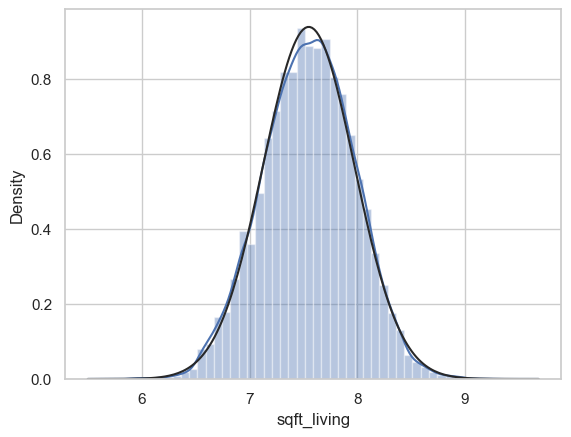

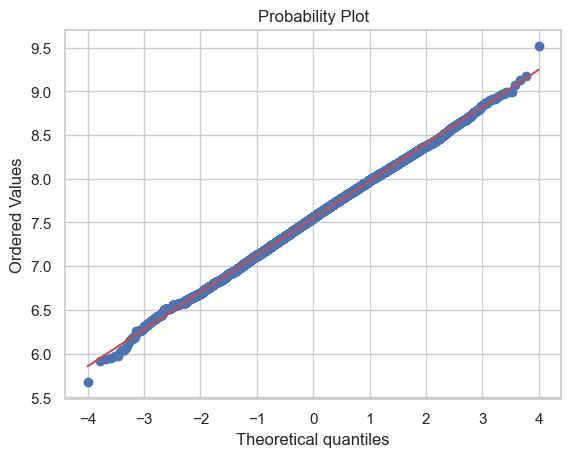

In [96]:
#transformed histogram and normal probability plot

sns.distplot(df['sqft_living'], fit=norm)
fig = plt.figure()
res = stats.probplot(df['sqft_living'], plot=plt)

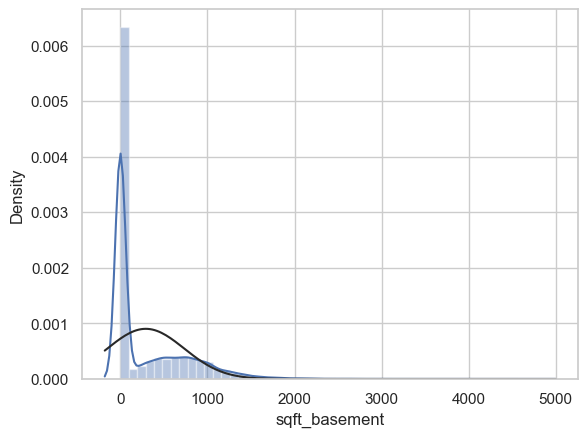

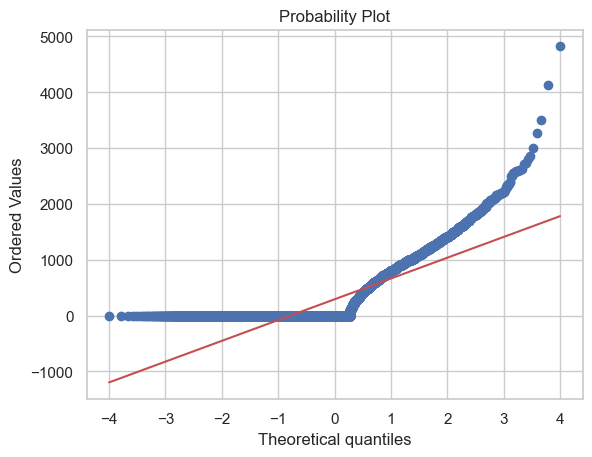

In [97]:
#histogram and normal probability plot

sns.distplot(df['sqft_basement'], fit=norm)
fig = plt.figure()
res = stats.probplot(df['sqft_basement'], plot=plt)

In [98]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0

df['basement'] = pd.Series(len(df['sqft_basement']), index=df.index)
df['basement'] = 0 
df.loc[df['sqft_basement']>0,'basement'] = 1

In [99]:
#transform data (log)

df.loc[df['basement']==1,'sqft_basement'] = np.log(df['sqft_basement'])

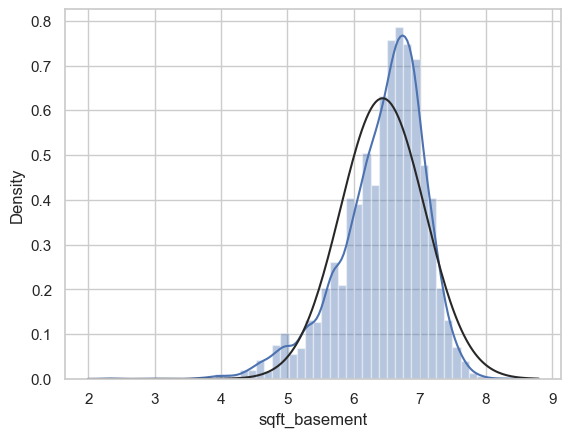

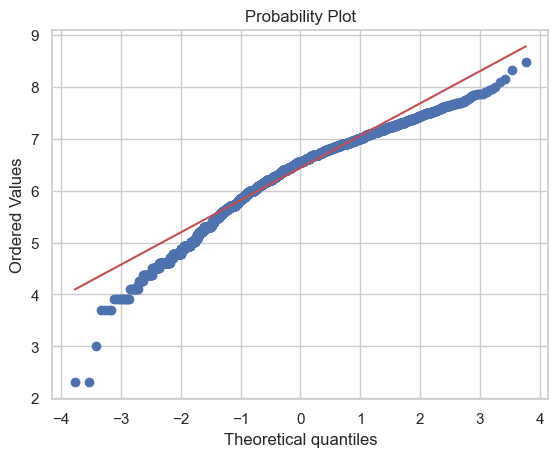

In [100]:
#histogram and normal probability plot

sns.distplot(df[df['sqft_basement']>0]['sqft_basement'], fit=norm)
fig = plt.figure()
res = stats.probplot(df[df['sqft_basement']>0]['sqft_basement'], plot=plt)

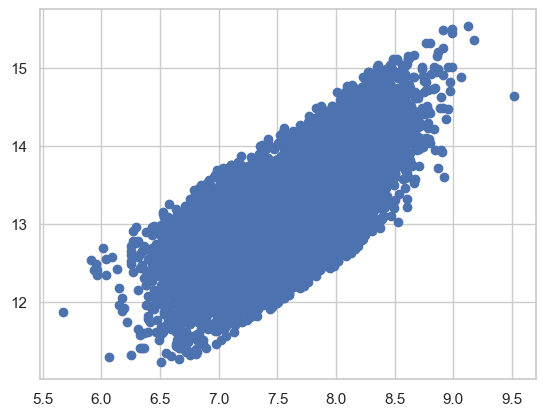

In [101]:
#scatter plot
plt.scatter(df['sqft_living'], df['price'])

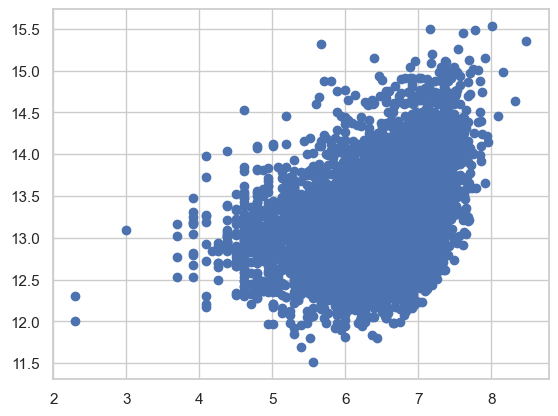

In [102]:
#scatter plot

plt.scatter(df[df['sqft_basement']>0]['sqft_basement'], df[df['sqft_basement']>0]['price'])

In [70]:
X = data.drop('price', axis=1)  
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR(),
    'XGBoost': xgb.XGBRegressor(),
    'LightGBM': lgb.LGBMRegressor(),
    'Gradient Boosting Regressor' : GradientBoostingRegressor(),
    'ADA Boost' : AdaBoostRegressor(),
    'K Neighbors Regressor' : KNeighborsRegressor(),
    'Linear SVR' : LinearSVR(),
    'Cat Boost Regressor' : CatBoostRegressor(),
}

In [72]:
Name = ['Linear Regression','Decision Tree','Random Forest','SVR','XGBoost','LightGBM','Gradient Boosting Regressor' ,'ADA Boost' ,'K Neighbors Regressor','Linear SVR','Cat Boost Regressor']
accuracy = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Results for {name}:")
    print("Mean Squared Error (MSE):", mse)
    print("Mean Absolute Error (MAE):", mae)
    print("R-squared Score:", r2)
    accuracy.append(r2)
    print()



Results for Linear Regression:
Mean Squared Error (MSE): 150629178055.31534
Mean Absolute Error (MAE): 239586.2037652276
R-squared Score: 0.003621815776830406

Results for Decision Tree:
Mean Squared Error (MSE): 146924122017.64258
Mean Absolute Error (MAE): 233945.16297212453
R-squared Score: 0.028129929376878082

Results for Random Forest:
Mean Squared Error (MSE): 146902503976.08398
Mean Absolute Error (MAE): 234051.13331692046
R-squared Score: 0.02827292786676383

Results for SVR:
Mean Squared Error (MSE): 160934062089.94797
Mean Absolute Error (MAE): 229624.47428497561
R-squared Score: -0.06454267782006773

Results for XGBoost:
Mean Squared Error (MSE): 146917996662.04184
Mean Absolute Error (MAE): 233940.50880464955
R-squared Score: 0.028170447228532014

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000172 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 117
[LightGBM] [Info] Number of dat

In [78]:
Name = ['Linear Regression','Decision Tree','Random Forest','SVR','XGBoost','LightGBM','Gradient Boosting Regressor' ,'ADA Boost' ,'K Neighbors Regressor','Linear SVR','Cat Boost Regressor']
accuracy


for elem1, elem2 in zip(Name, accuracy):
    print(f"accuracy for {elem1}")
    print(f"accuracy is : {elem2}")
    print()

accuracy for Linear Regression
accuracy is : 0.003621815776830406

accuracy for Decision Tree
accuracy is : 0.028129929376878082

accuracy for Random Forest
accuracy is : 0.02827292786676383

accuracy for SVR
accuracy is : -0.06454267782006773

accuracy for XGBoost
accuracy is : 0.028170447228532014

accuracy for LightGBM
accuracy is : 0.028636649628739463

accuracy for Gradient Boosting Regressor
accuracy is : 0.03100788057256343

accuracy for ADA Boost
accuracy is : -0.08395054272255509

accuracy for K Neighbors Regressor
accuracy is : -0.12520846803502406

accuracy for Linear SVR
accuracy is : -0.0684740166519493

accuracy for Cat Boost Regressor
accuracy is : 0.028614145432400373



Text(0.5, 1.0, 'Model Accuracies')

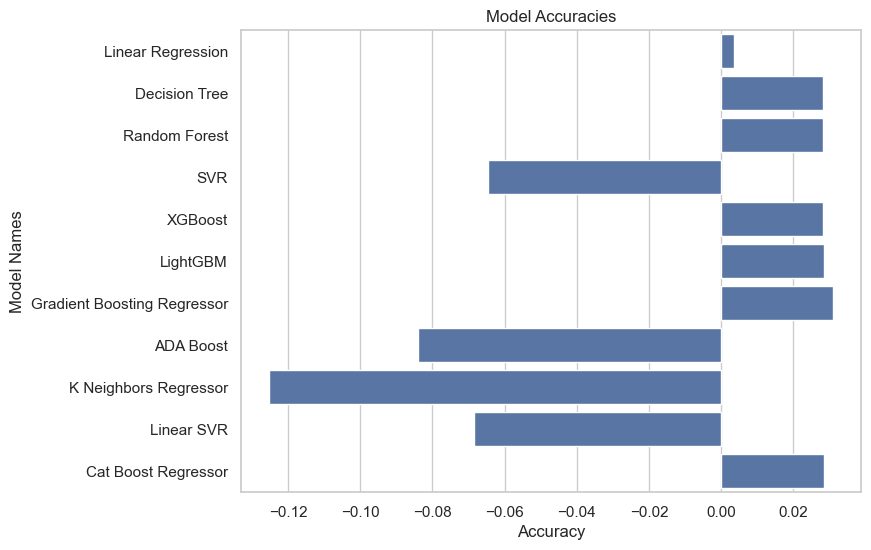

In [79]:
data = pd.DataFrame({"Names": Name, "Accuracies": accuracy})

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

sns.barplot(x="Accuracies", y="Names", data=data, color="b")

plt.xlabel("Accuracy")
plt.ylabel("Model Names")
plt.title("Model Accuracies")